In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [9]:
seed = 7
np.random.seed(seed)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")

X_train = X_train / 255
X_test = X_test / 255
Y_test_bk = Y_test.copy()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [3]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary() 

model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
__________

In [4]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("train {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("test {:.2f}".format(accuracy))

train 0.99
test 0.99


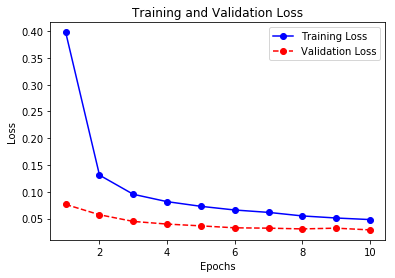

In [6]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

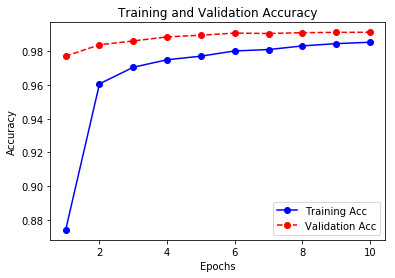

In [7]:
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
Y_pred = model.predict_classes(X_test)
tb = pd.crosstab(Y_test_bk.astype(int), Y_pred.astype(int),
                 rownames=["label"], colnames=["predict"])
print(tb)

predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        978     0     0     0    0    0    0     1    1    0
1          0  1134     0     0    0    0    0     1    0    0
2          1     0  1029     0    0    0    0     2    0    0
3          0     0     0  1004    0    4    0     0    2    0
4          0     0     0     0  976    0    0     1    1    4
5          1     0     0     6    0  882    1     0    1    1
6          7     2     0     0    1    2  946     0    0    0
7          0     1     4     1    0    0    0  1021    1    0
8          3     1     1     1    0    1    0     2  964    1
9          0     3     0     2    6    2    0     2    2  992


[[6.7773098e-09 1.7488092e-06 1.1063028e-06 1.0675397e-07 3.0531629e-03
  3.7713895e-07 5.4664313e-09 4.1428910e-07 4.4244622e-05 9.9689889e-01]]


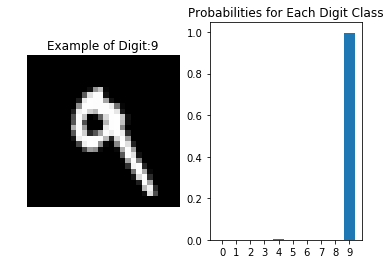

In [14]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
i = 7
digit = X_test[i].reshape(28, 28)
X_test_digit = X_test[i].reshape(1, 28, 28, 1).astype("float32")
X_test_digit = X_test_digit / 255
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(Y_test[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")


probs = model.predict_proba(X_test_digit, batch_size=1)
print(probs)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

In [15]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_test_bk = X_test.copy()
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
X_test = X_test / 255
Y_pred = model.predict_classes(X_test)  # 分類
Y_probs = model.predict_proba(X_test)   # 機率
df = pd.DataFrame({"label":Y_test, "predict":Y_pred})
df = df[Y_test!=Y_pred]  # 篩選出分類錯誤的資料
print(df.head())

     label  predict
18       3        5
259      6        0
445      6        0
582      8        2
674      5        3


Index:  1901


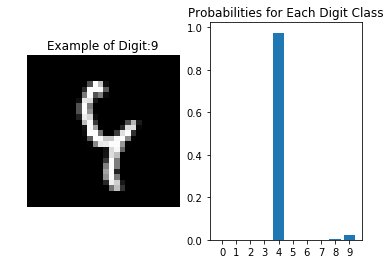

In [16]:
i = df.sample(n=1).index.values.astype(int)[0]
print("Index: ", i)
digit = X_test_bk[i].reshape(28, 28) 

plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(Y_test[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()